---
title: "Height"
author: "Mads Chr. Hansen"
date: "2023-10-08"
categories: [PyMC]
image: "image.jpg"
format:
  html:
    code-fold: true
toc: true
---

# Analysis of Height

In [186]:
import pandas as pd
import arviz as az
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import xarray as xr
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

az.style.use(["arviz-darkgrid"])
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
data = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')

In [188]:
data.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

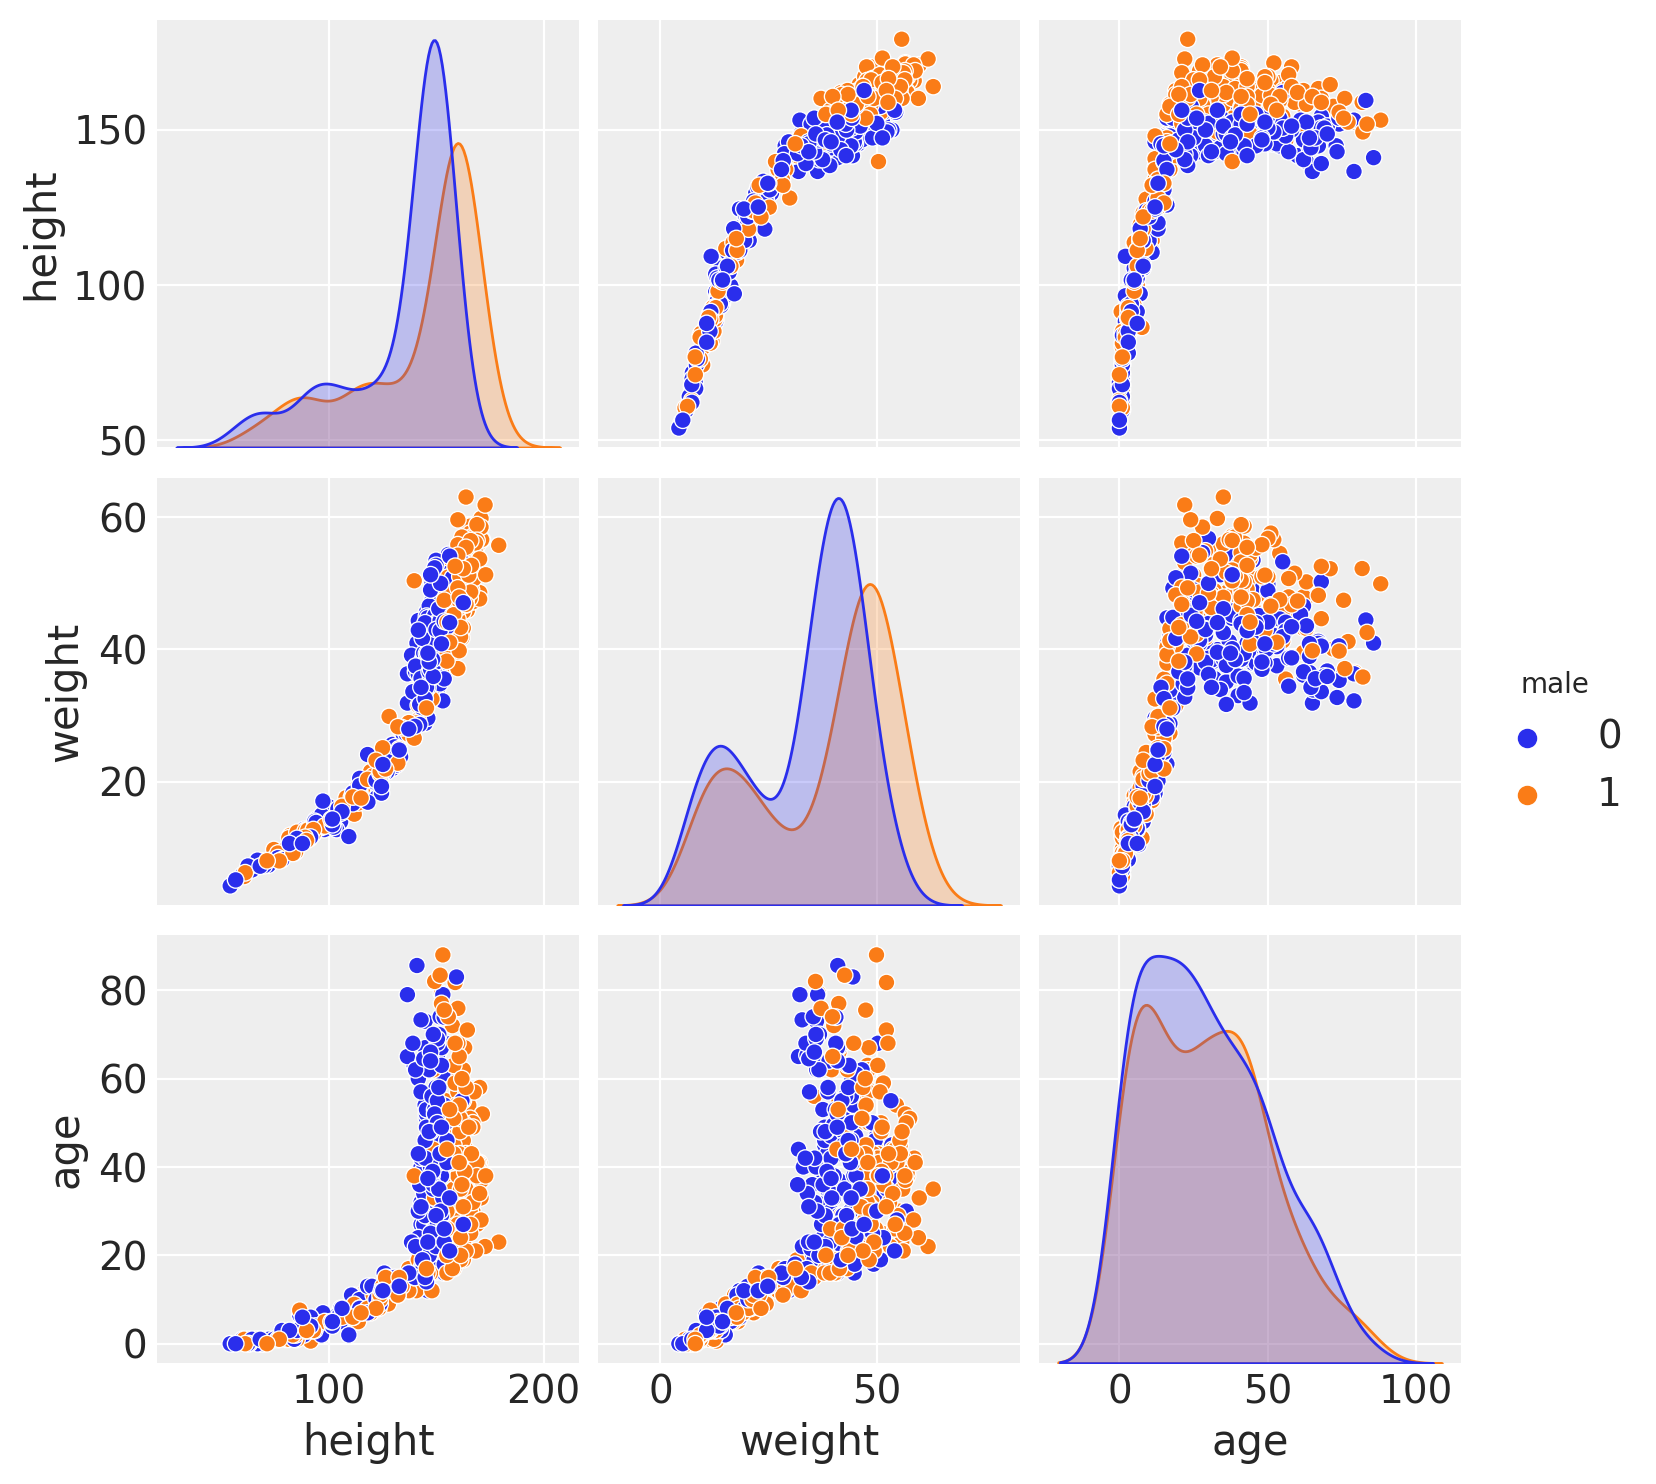

In [189]:
sns.pairplot(data, hue='male')

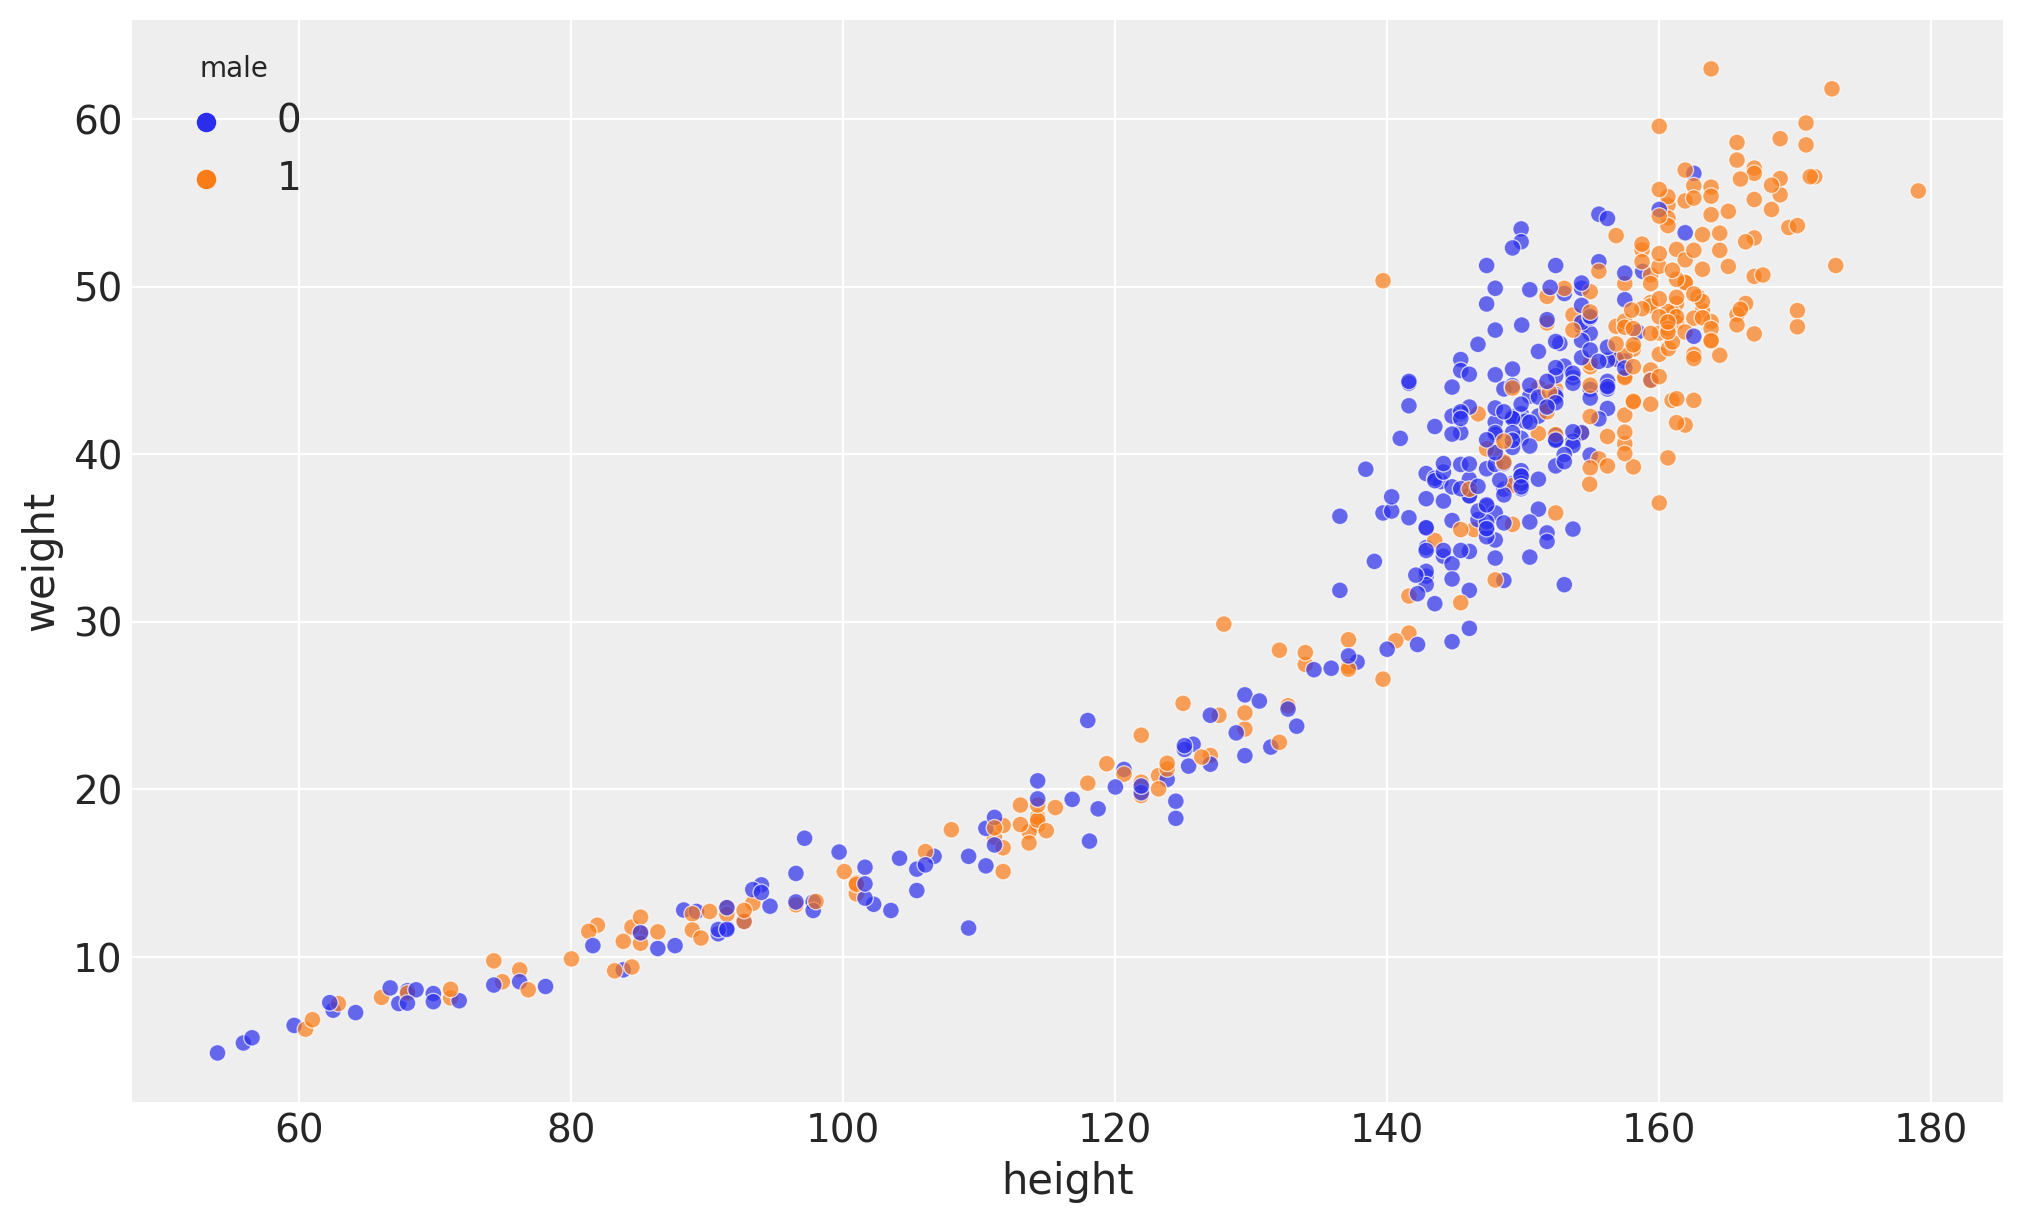

In [190]:
sns.scatterplot(data, x='height', y='weight', alpha=0.7, hue='male');

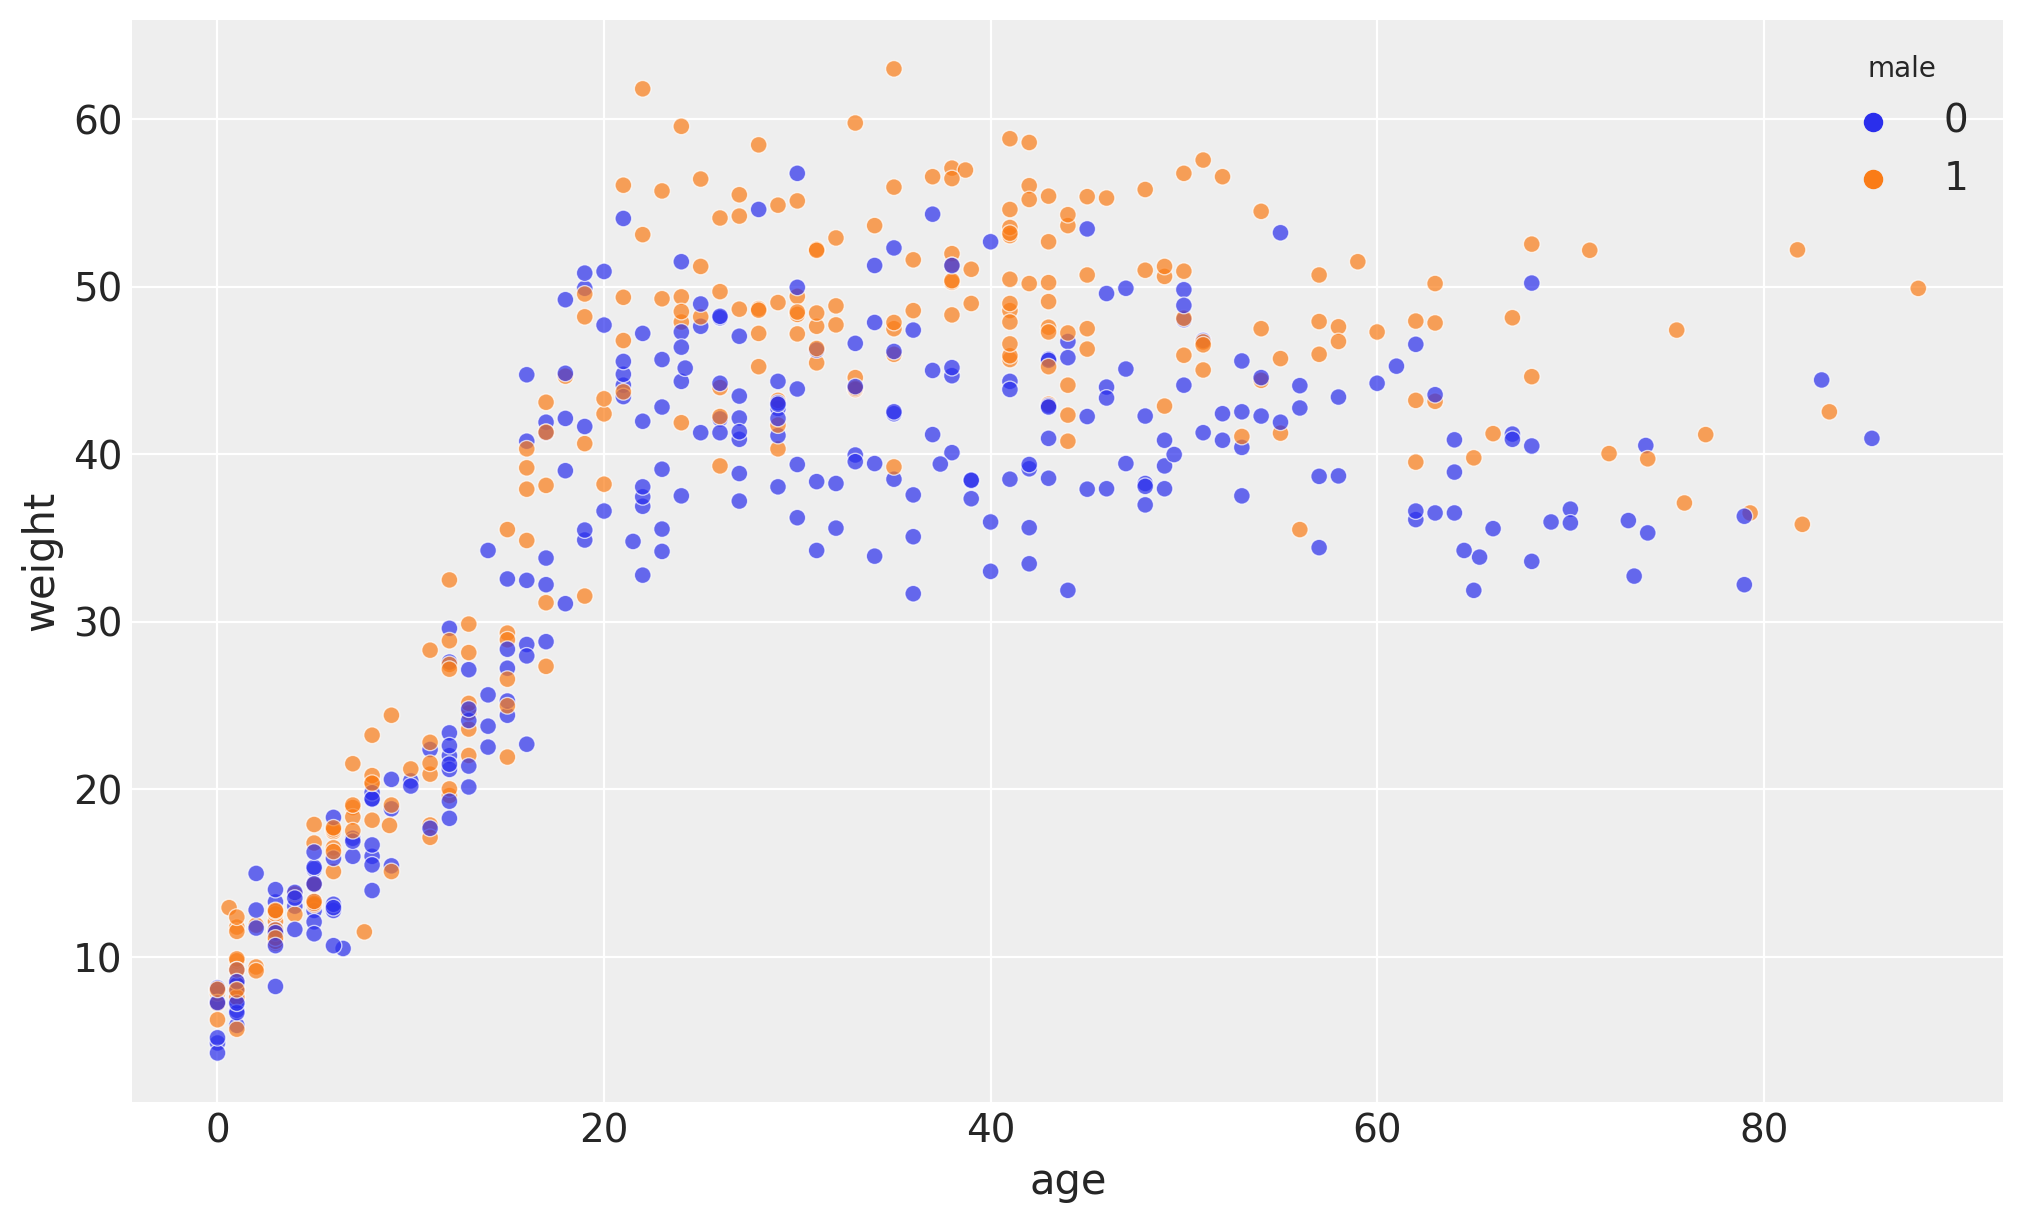

In [191]:
sns.scatterplot(data, x='age', y='weight', alpha=0.7, hue='male');

It seems that there is a linear relationship from age 0 to 18 and then it levels out. Males at a higher level.

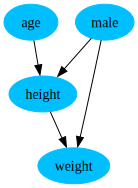

In [49]:
g = gr.Digraph()
g.node(name="height", label="height", color="deepskyblue", style="filled")
g.node(name="weight", label="weight", color="deepskyblue", style="filled")
g.node(name="male", label="male", color="deepskyblue", style="filled")
g.node(name="age", label="age", color="deepskyblue", style="filled")
g.edge(tail_name="height", head_name="weight")
g.edge(tail_name="age", head_name="height")
g.edge(tail_name="male", head_name="height")
g.edge(tail_name="male", head_name="weight")
g

# Basic Model
No regressors

Text(0.5, 1.0, 'Histogram of Weight')

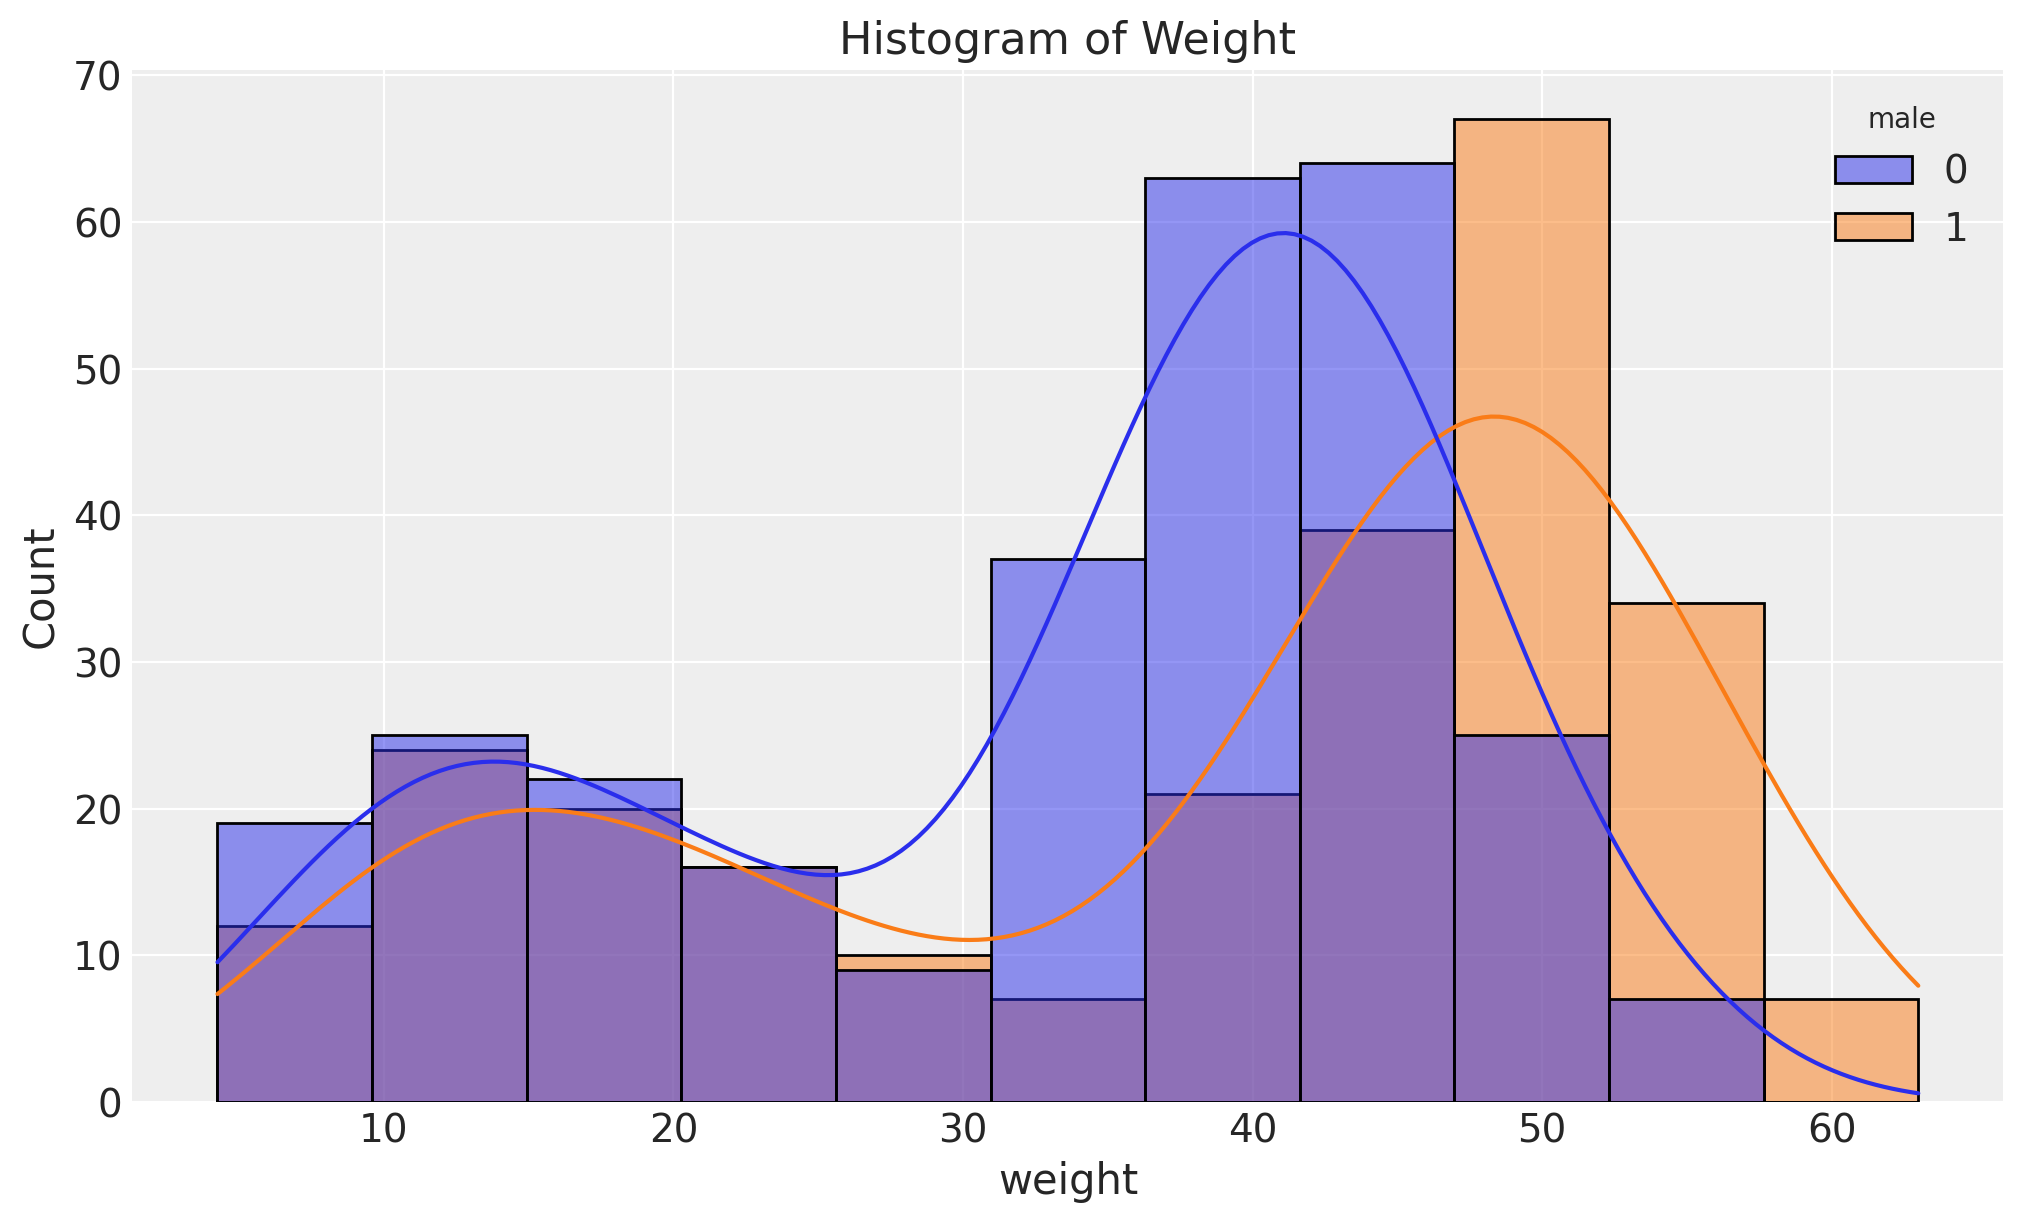

In [192]:
sns.histplot(data, x='weight', kde=True, hue='male');
plt.title('Histogram of Weight')

In [87]:
with pm.Model() as basic_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=30, sigma=1)
    obs = pm.Normal("mass", mu=mu, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_basic = pm.sample()
    pm.compute_log_likelihood(idata_basic, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_basic, extend_inferencedata=True)

Sampling: [mass, mu, sigma]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


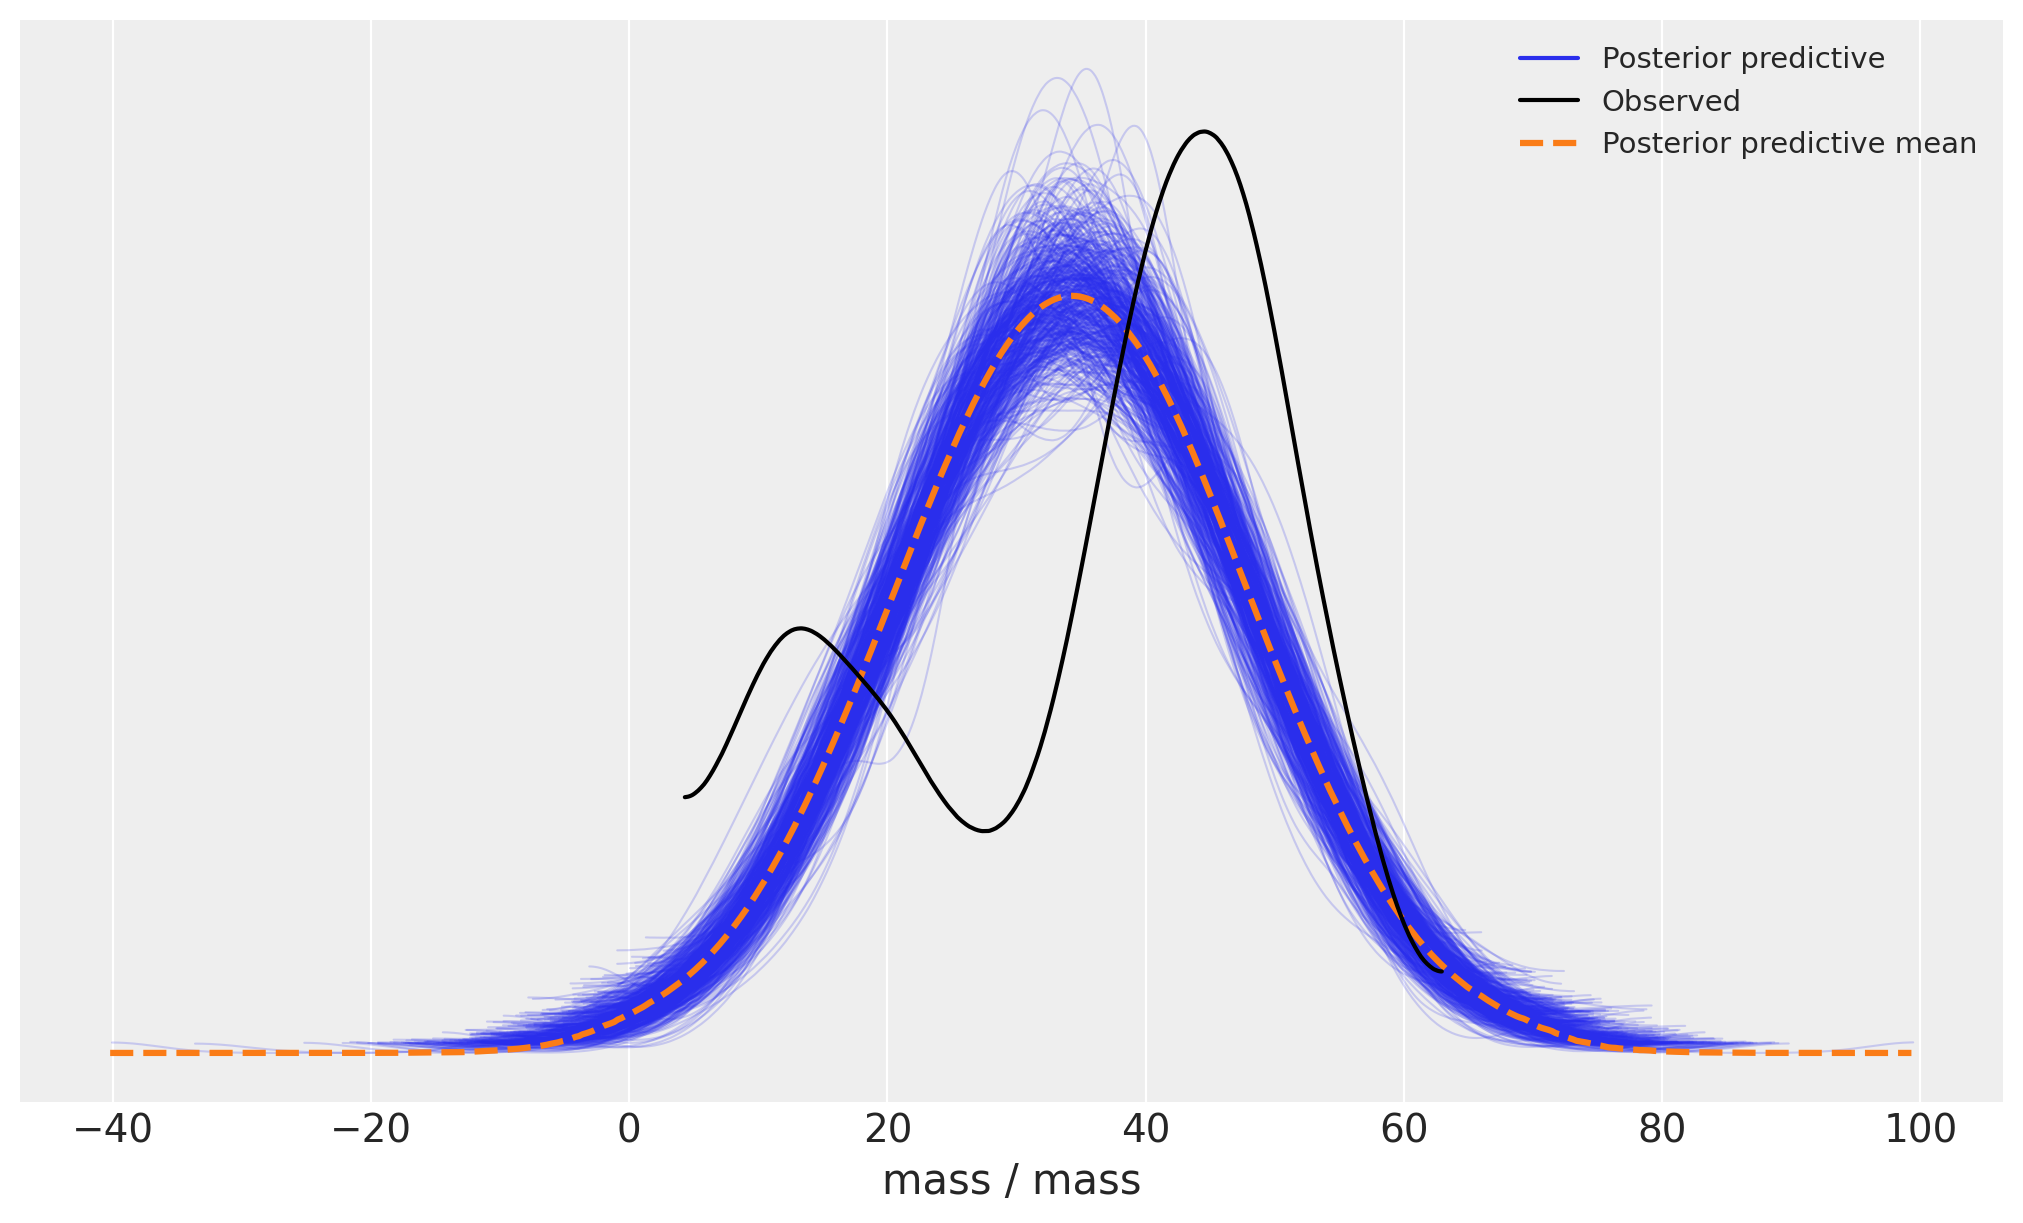

In [193]:
az.plot_ppc(data=idata_basic, group="posterior", kind="kde", num_pp_samples=500);


In [103]:
male_idx, male = data["male"].astype('category').factorize(sort=True)

In [152]:
coords = {
    "male": male,
    "obs": range(len(data))
}

In [108]:
with pm.Model(coords=coords) as male_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=30, sigma=1, dims="male")
    obs = pm.Normal("mass", mu=mu[male_idx], sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_male = pm.sample()
    pm.compute_log_likelihood(idata_male, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_male, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


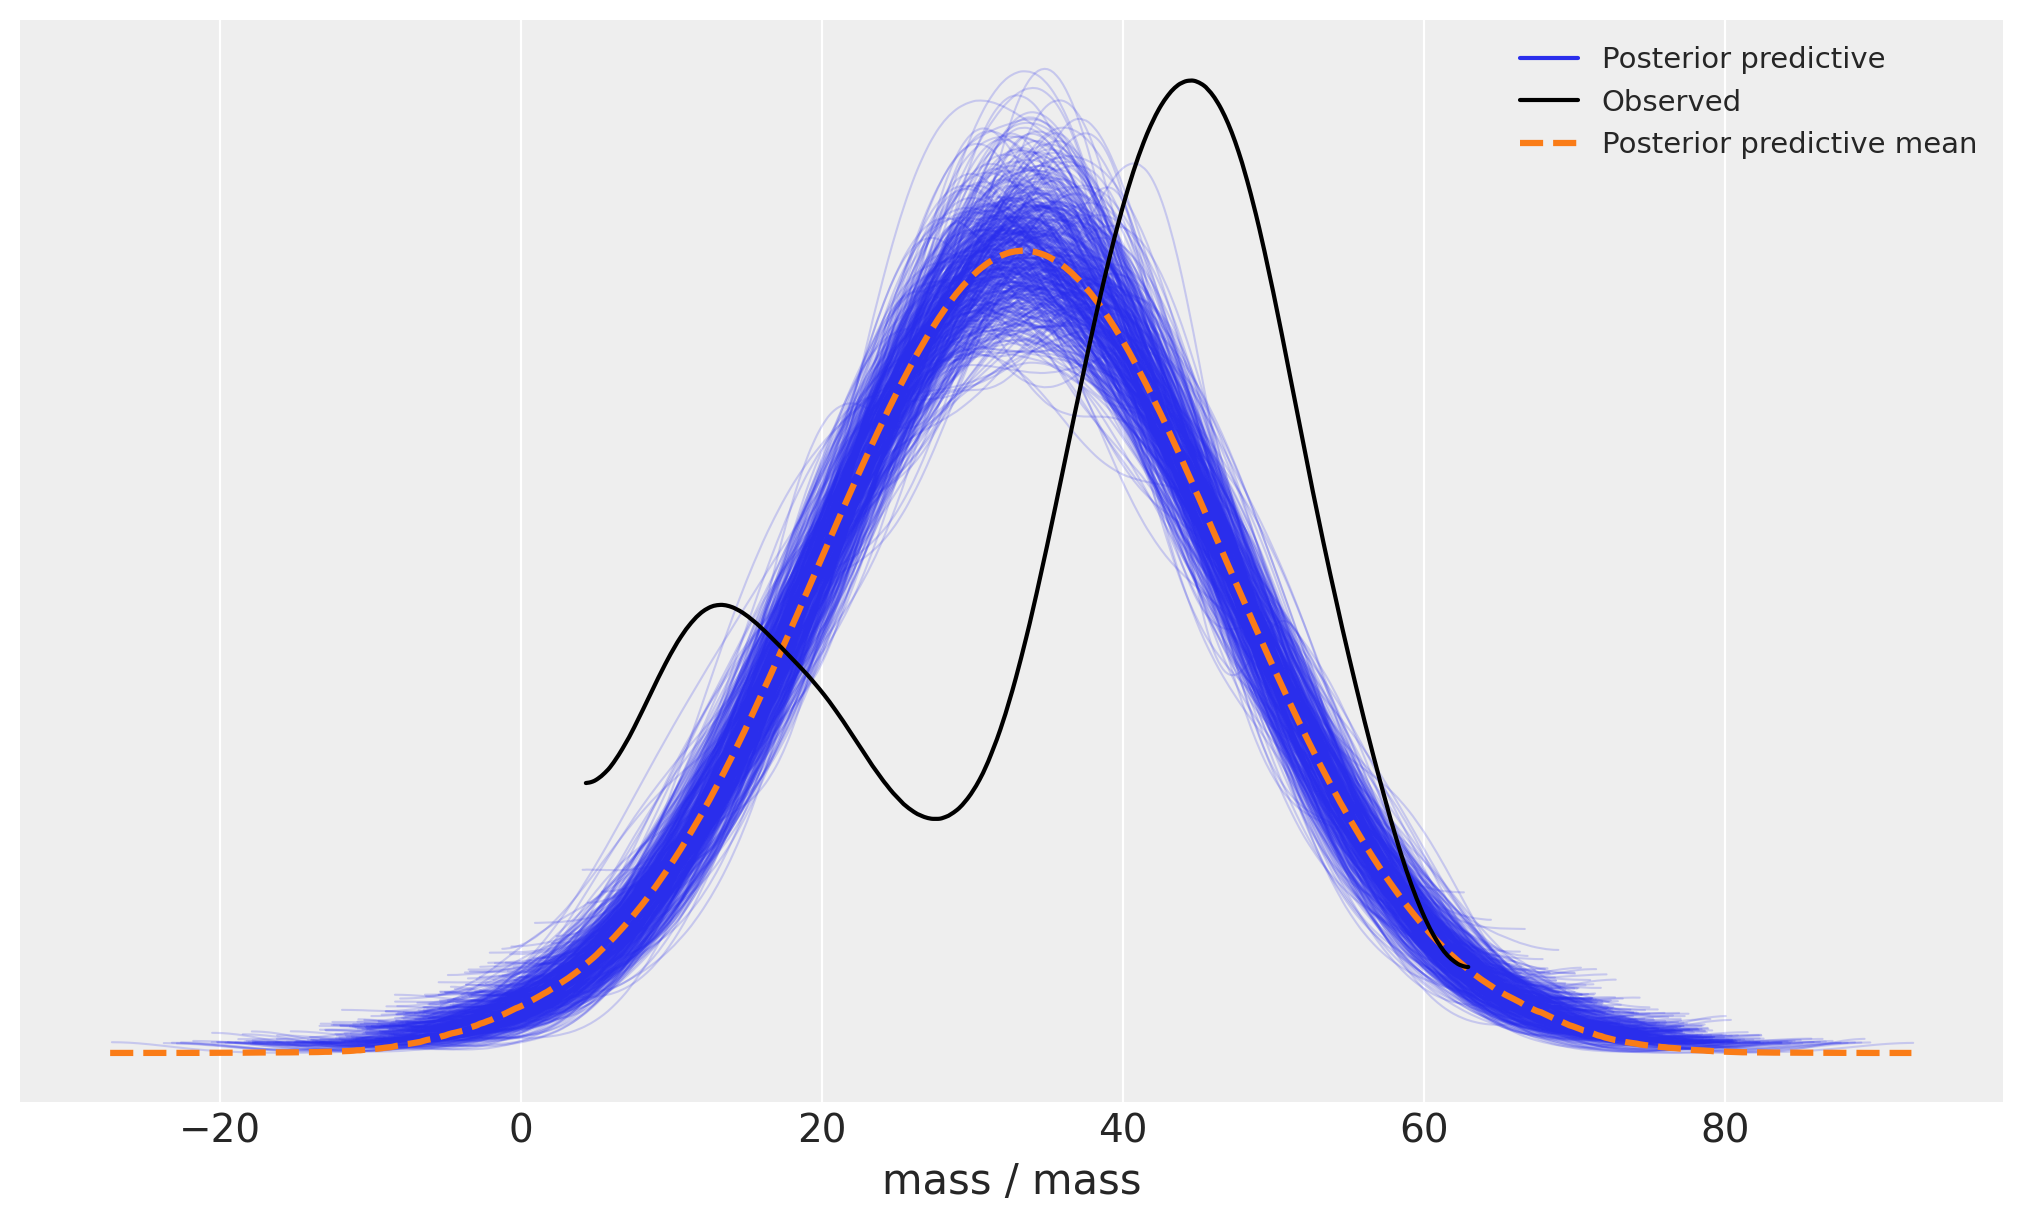

In [109]:
az.plot_ppc(data=idata_male, group="posterior", kind="kde", num_pp_samples=500);

In [112]:
with pm.Model(coords=coords) as age_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2)
    obs = pm.Normal("mass", mu=mu*data.age, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_age = pm.sample()
    pm.compute_log_likelihood(idata_age, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_age, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


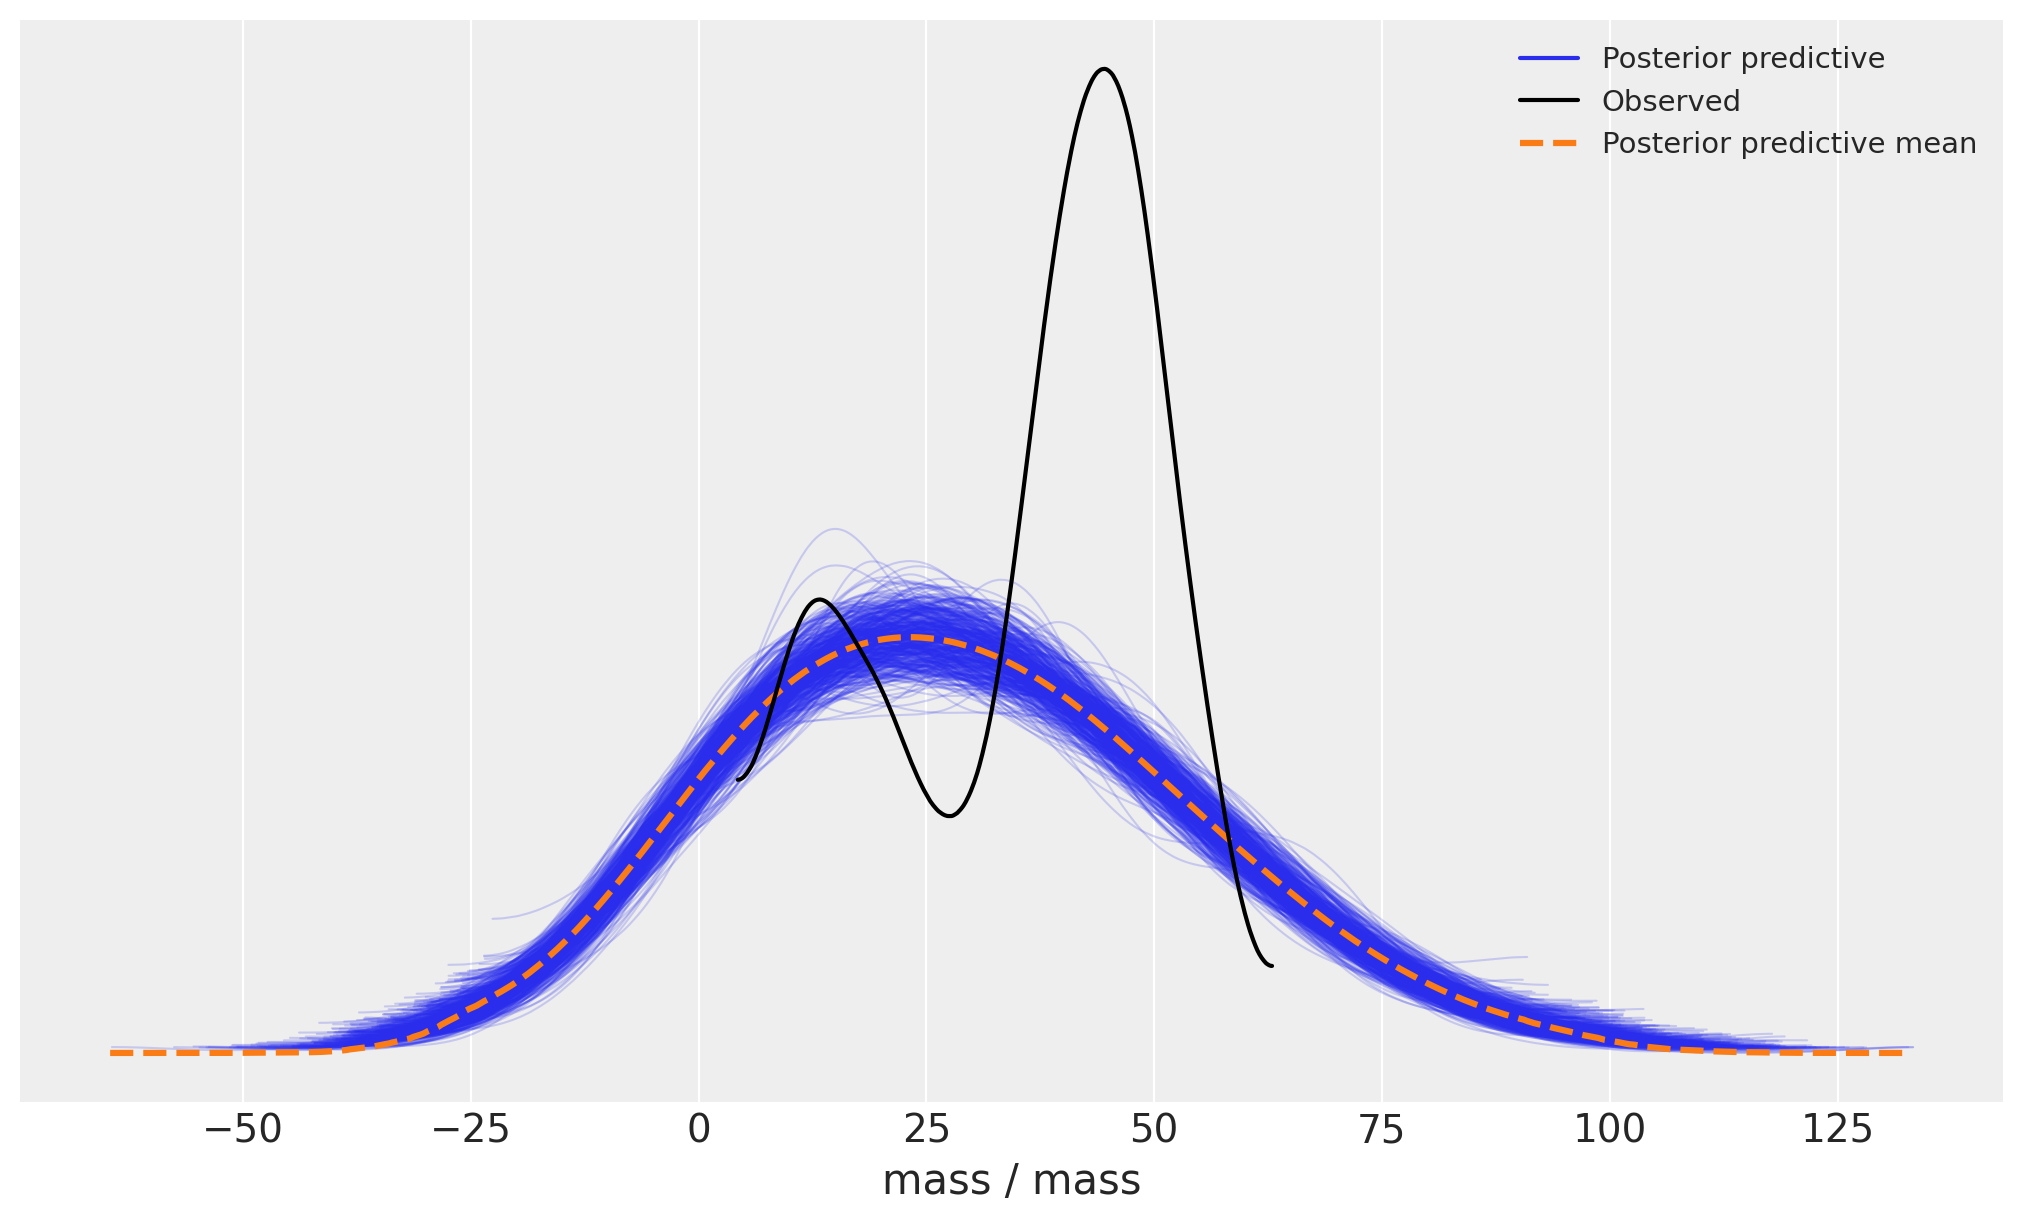

In [113]:
az.plot_ppc(data=idata_age, group="posterior", kind="kde", num_pp_samples=500);

In [114]:
with pm.Model(coords=coords) as height_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2)
    obs = pm.Normal("mass", mu=mu*data.height, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_height = pm.sample()
    pm.compute_log_likelihood(idata_height, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_height, extend_inferencedata=True)

Sampling: [mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Sampling: [mass]


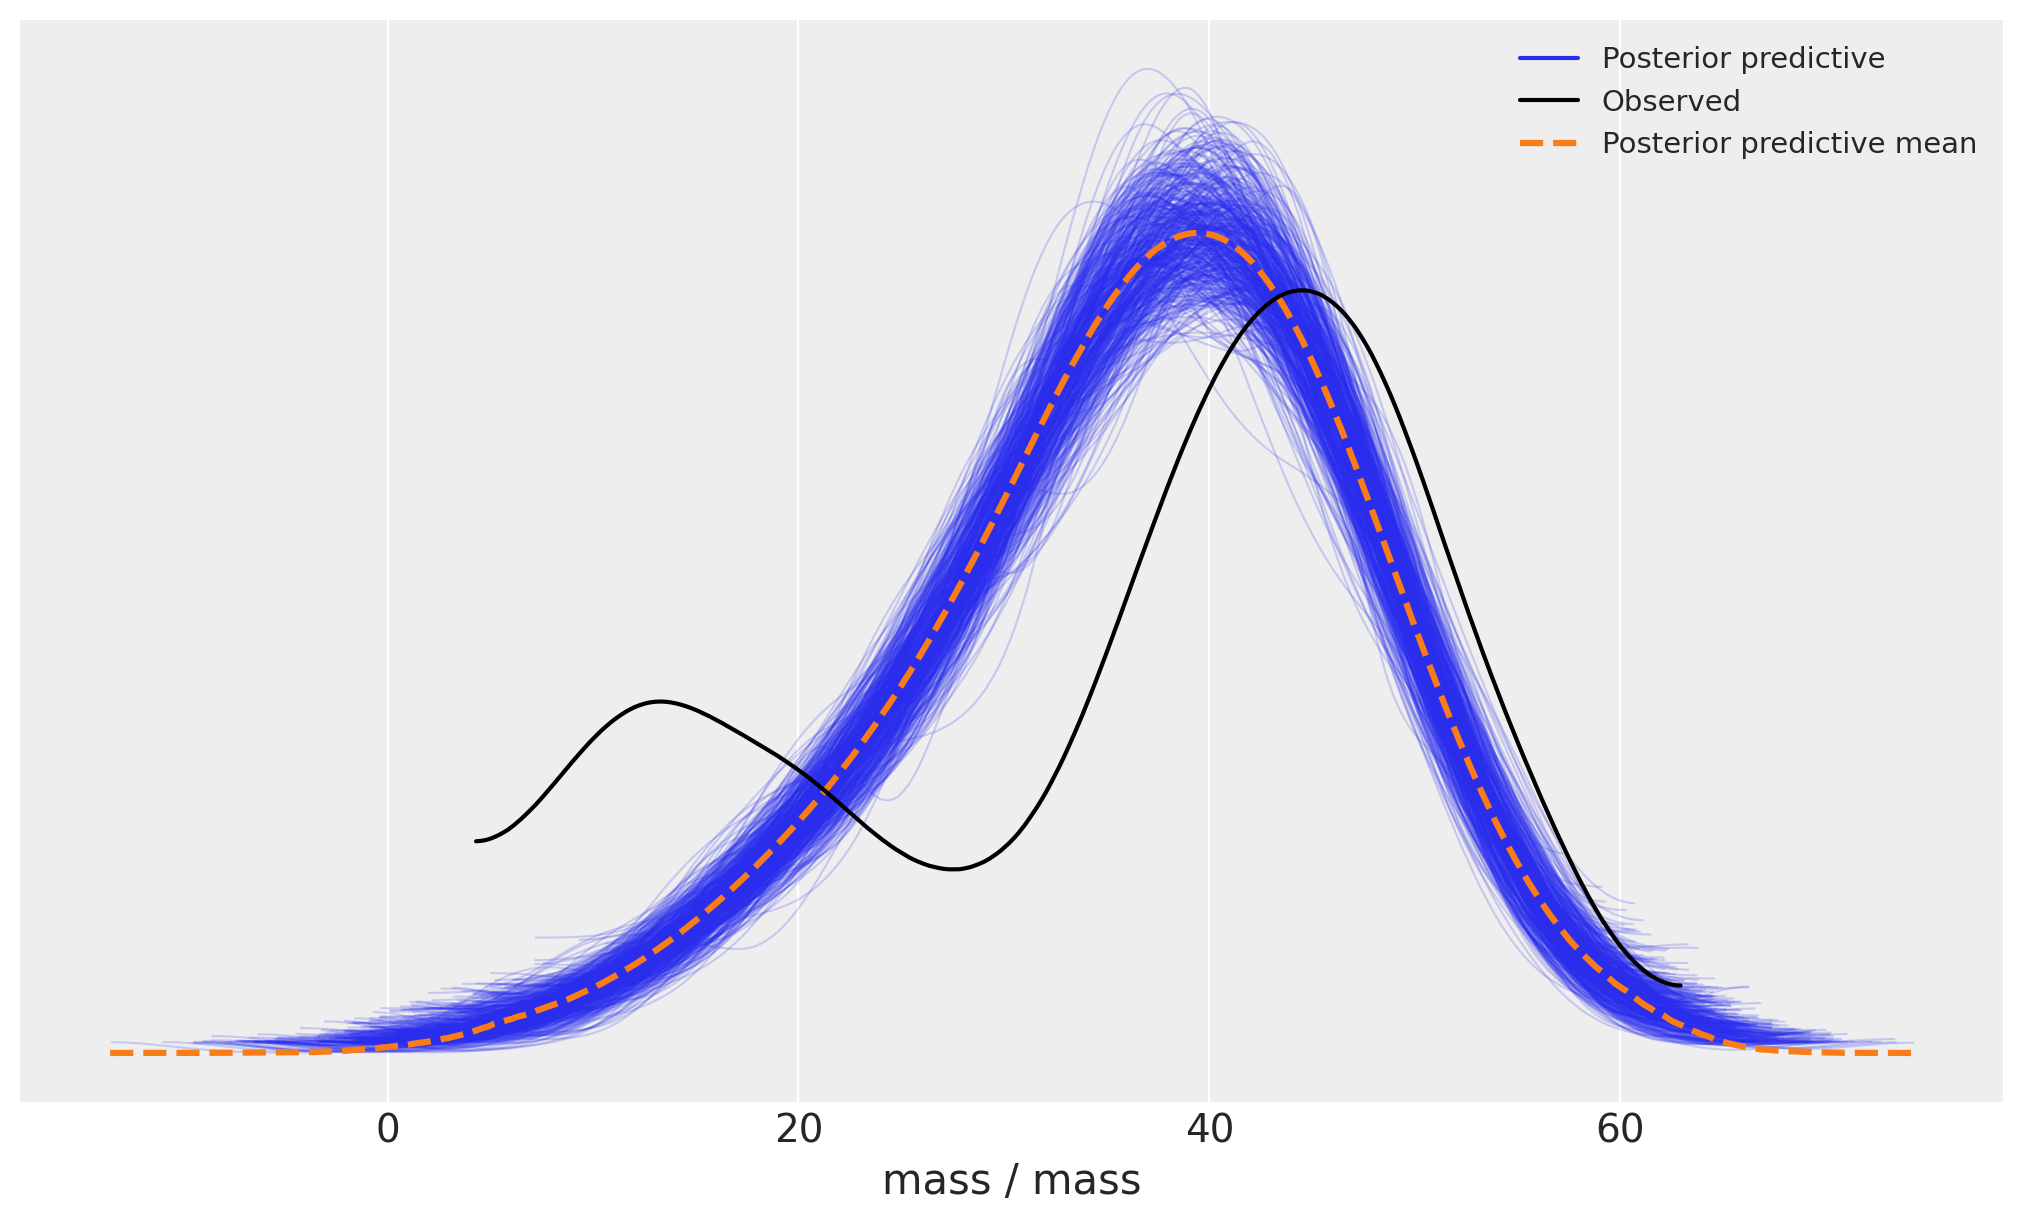

In [115]:
az.plot_ppc(data=idata_height, group="posterior", kind="kde", num_pp_samples=500);

In [126]:
with pm.Model(coords=coords) as height_exp_model:
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2)
    e = pm.Normal('e', mu=1, sigma=2)
    obs = pm.Normal("mass", mu=mu*data.height.values ** e, sigma=sigma, observed=data.weight)
    
    prior = pm.sample_prior_predictive()
    idata_height_exp = pm.sample()
    pm.compute_log_likelihood(idata_height_exp, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_height_exp, extend_inferencedata=True)

Sampling: [e, mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, e]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling: [mass]


In [127]:
az.summary(idata_height_exp)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     0.000  0.000   0.000    0.000      0.000    0.000     976.0    1144.0   
e      2.609  0.048   2.524    2.702      0.002    0.001     976.0    1118.0   
sigma  3.870  0.108   3.676    4.084      0.003    0.002    1652.0    1581.0   

       r_hat  
mu       1.0  
e        1.0  
sigma    1.0

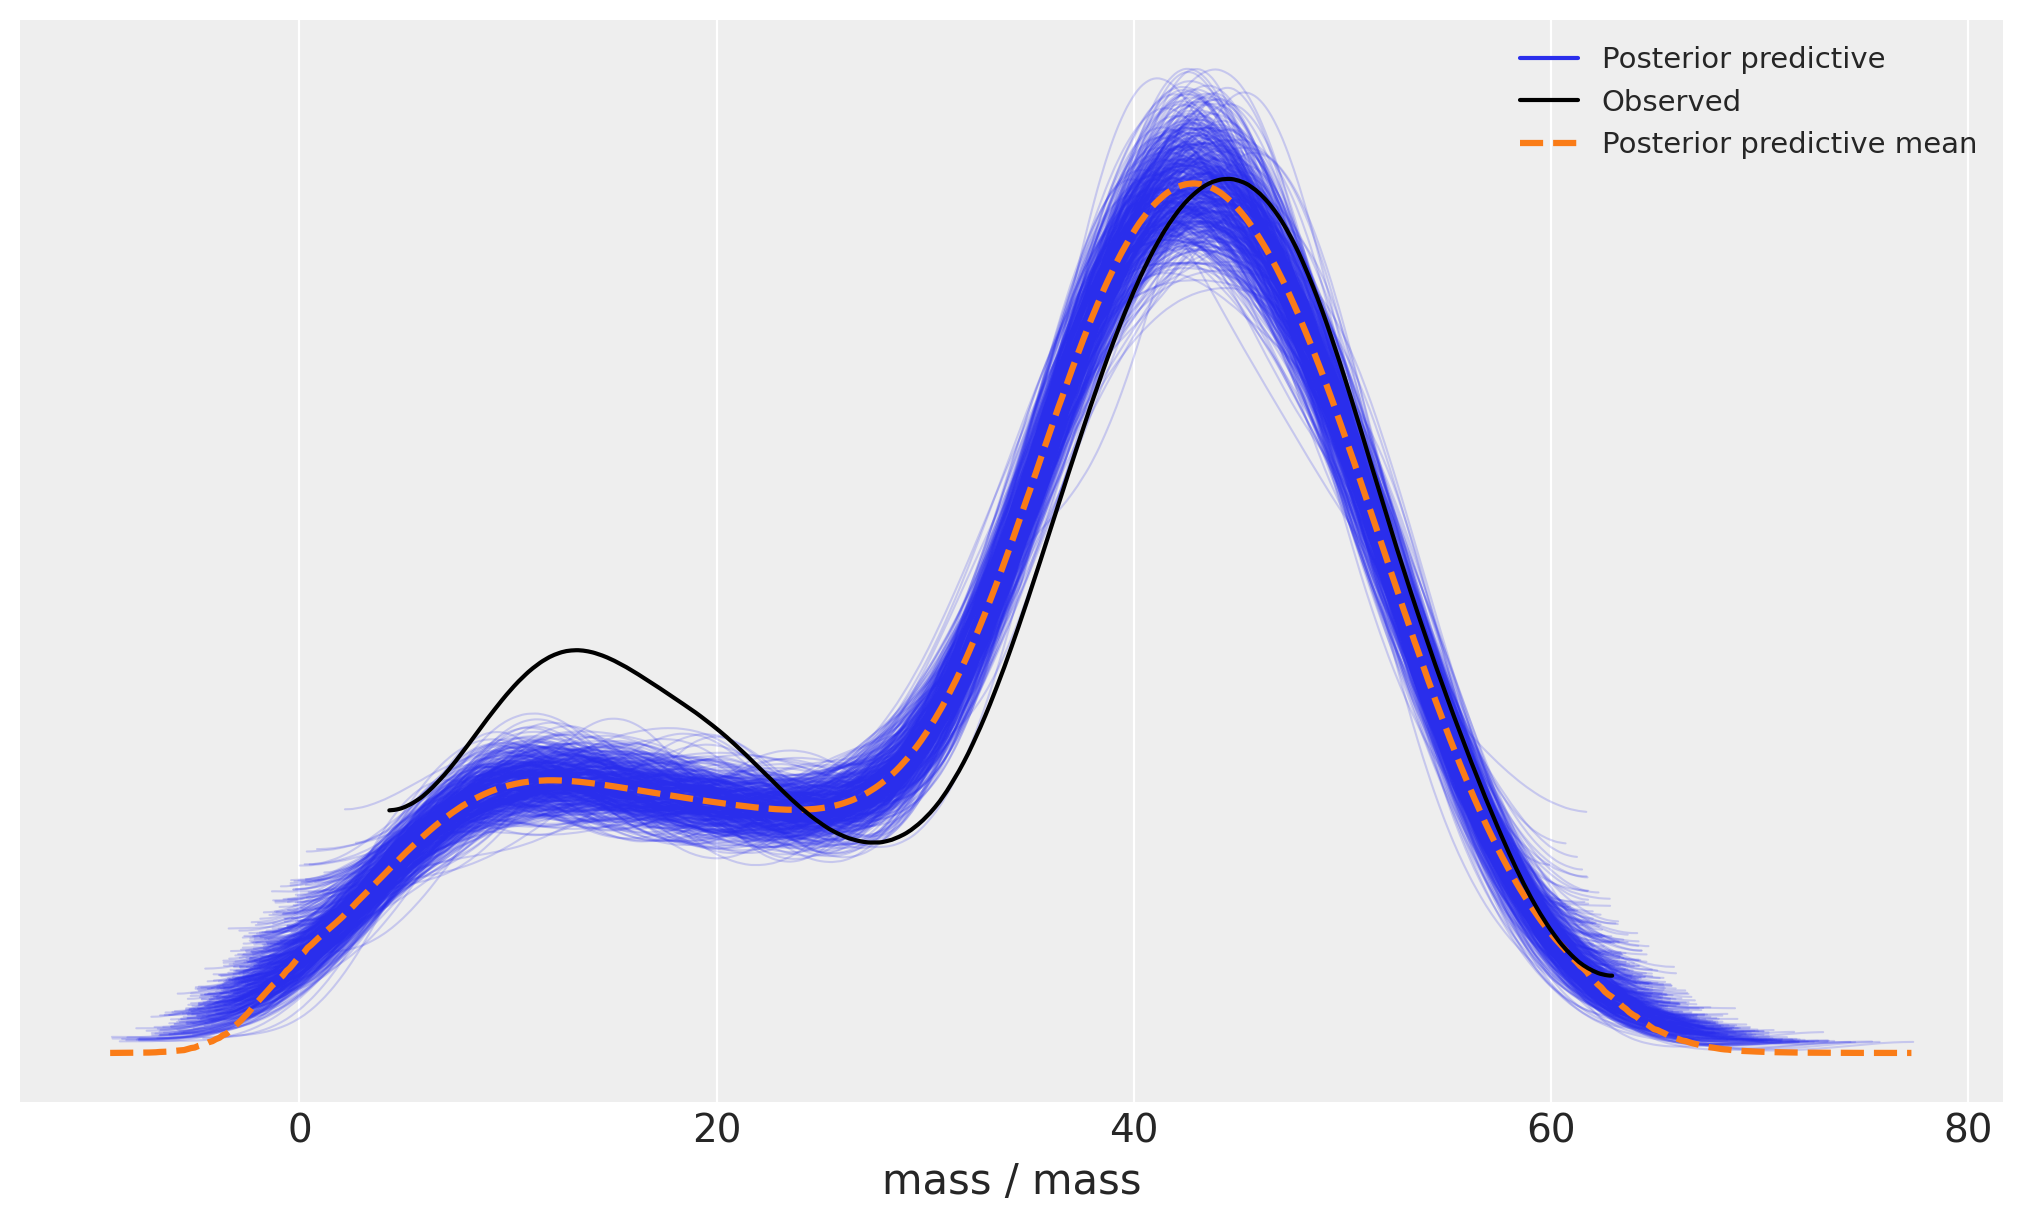

In [128]:
az.plot_ppc(data=idata_height_exp, group="posterior", kind="kde", num_pp_samples=500);

In [139]:
az.compare({'basic': idata_basic, 'age': idata_age, 'male': idata_male, 'height': idata_height, 'heigh_exp': idata_height_exp, 'height_exp_male': idata_height_exp_male})

rank     elpd_loo     p_loo   elpd_diff        weight  \
height_exp_male     0 -1524.374838  5.303433    0.000000  8.665450e-01   
heigh_exp           1 -1528.789340  3.374519    4.414502  1.245465e-01   
height              2 -1925.369594  1.437219  400.994756  8.908504e-03   
male                3 -2244.043232  2.146733  719.668394  0.000000e+00   
basic               4 -2244.925171  1.502977  720.550334  0.000000e+00   
age                 5 -2305.565617  2.804780  781.190779  2.322644e-10   

                        se        dse  warning scale  
height_exp_male  20.521787   0.000000    False   log  
heigh_exp        20.625731   3.742969    False   log  
height           12.588644  21.859826    False   log  
male             12.727979  23.946396    False   log  
basic            13.597773  24.712621    False   log  
age              18.062763  24.002201    False   log

In [153]:
with pm.Model(coords=coords) as height_exp_age_model:
    height = pm.ConstantData('height', data.height.values)
    sigma = pm.Exponential("sigma", 10)
    mu = pm.Normal('mu', mu=1, sigma=2, dims='male')
    e = pm.Normal('e', mu=1, sigma=2, dims='male')
    obs = pm.TruncatedNormal("mass", mu=mu[male_idx]*height ** e[male_idx], sigma=sigma, lower=0, observed=data.weight, dims='obs')
    
    prior = pm.sample_prior_predictive()
    idata_height_exp_male = pm.sample()
    pm.compute_log_likelihood(idata_height_exp_male, extend_inferencedata=True)
    pm.sample_posterior_predictive(idata_height_exp_male, extend_inferencedata=True)

Sampling: [e, mass, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu, e]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 123 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 74 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling: [mass]


In [154]:
az.summary(idata_height_exp_male)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu[0]  0.000  0.000   0.000    0.000      0.000    0.000      92.0      24.0   
mu[1]  0.000  0.000   0.000    0.000      0.000    0.000    1140.0    1345.0   
e[0]   2.780  0.091   2.637    2.969      0.010    0.007      92.0      24.0   
e[1]   2.624  0.066   2.499    2.750      0.002    0.001    1140.0    1341.0   
sigma  3.861  0.110   3.664    4.085      0.002    0.002    2249.0    1910.0   

       r_hat  
mu[0]   1.03  
mu[1]   1.01  
e[0]    1.03  
e[1]    1.01  
sigma   1.00

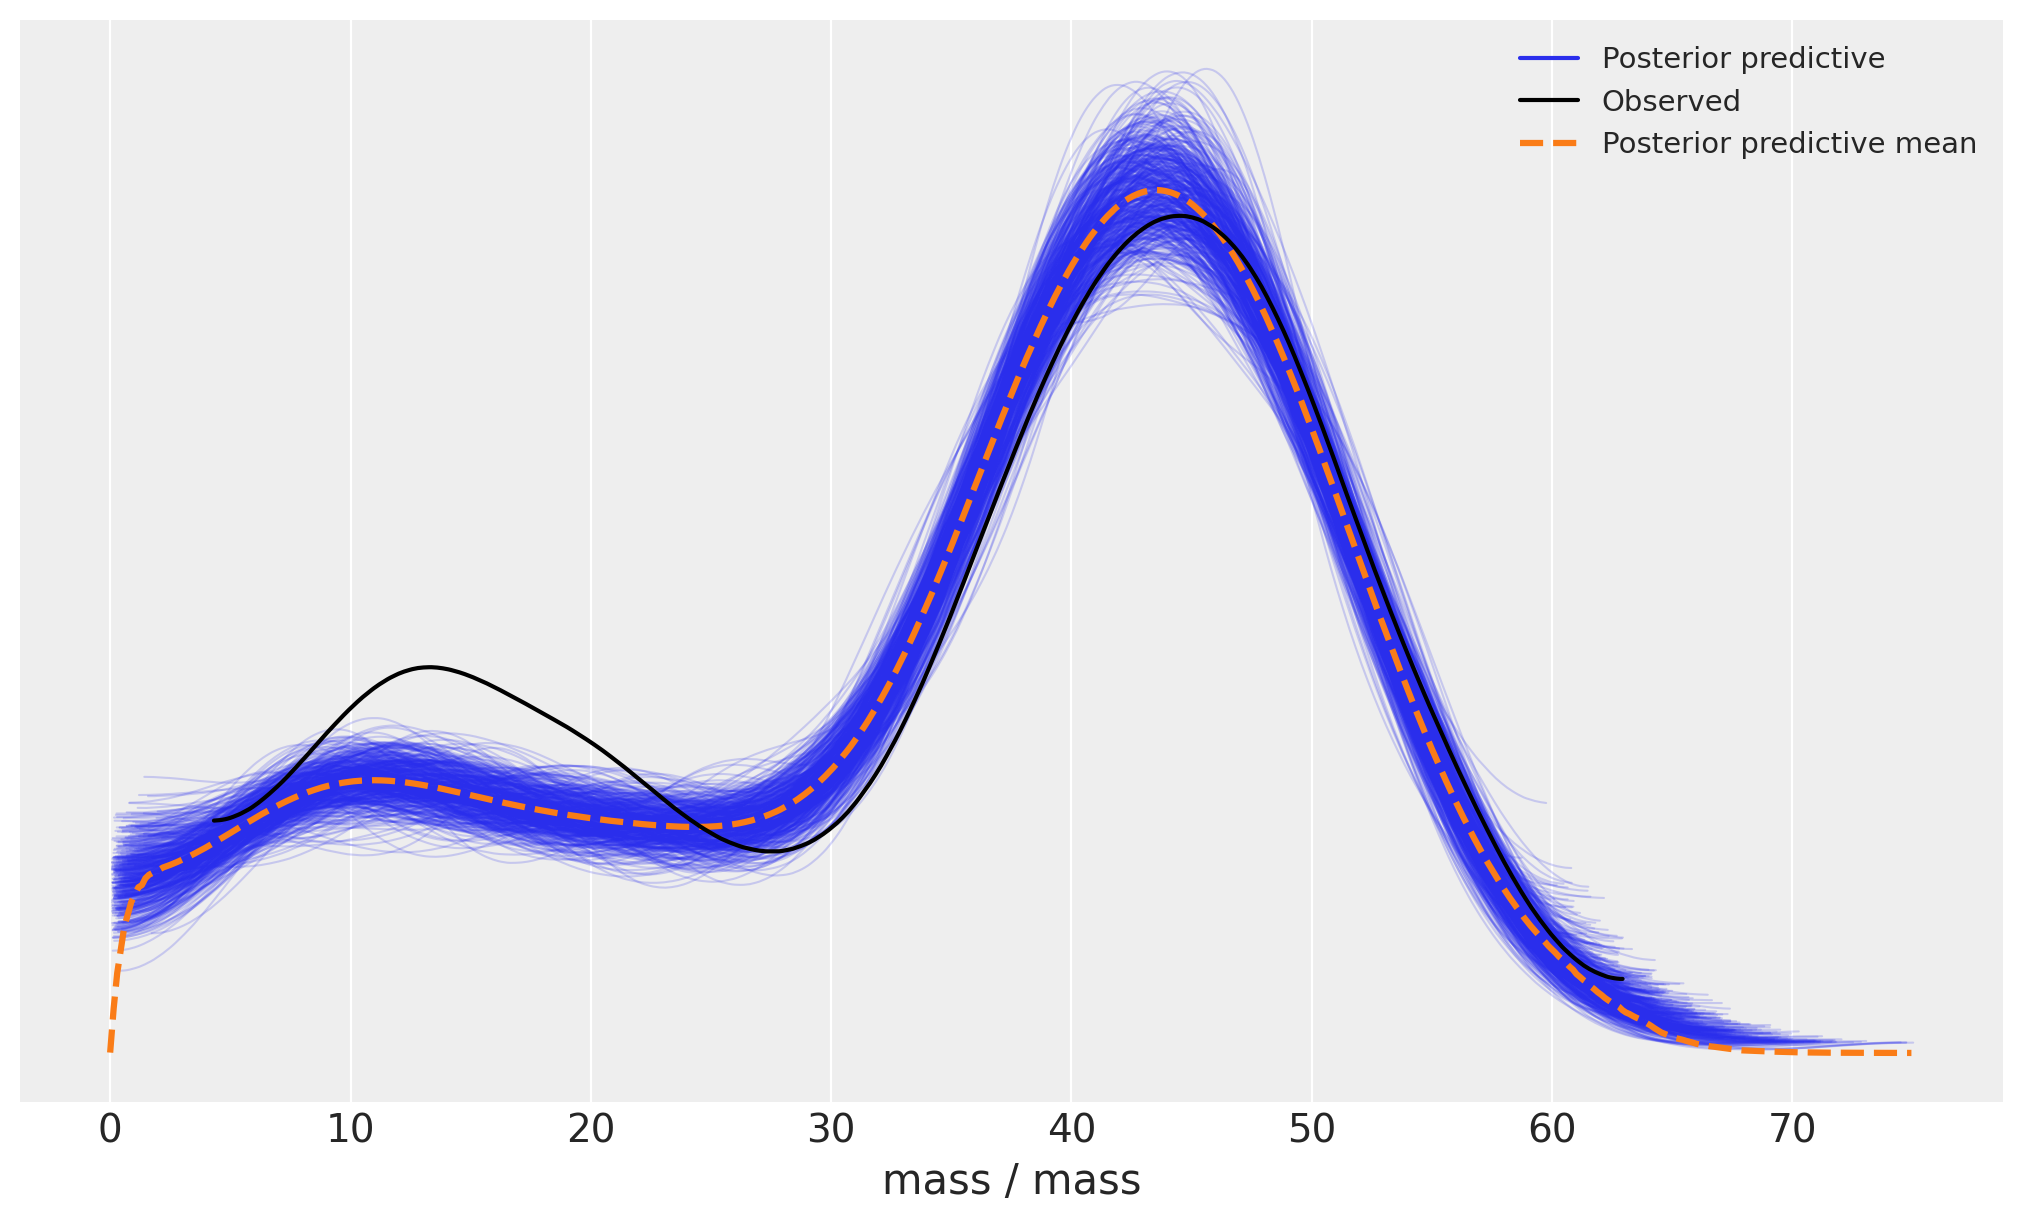

In [155]:
az.plot_ppc(data=idata_height_exp_male, group="posterior", kind="kde", num_pp_samples=500);

array([[<Axes: xlabel='height', ylabel='mass'>]], dtype=object)

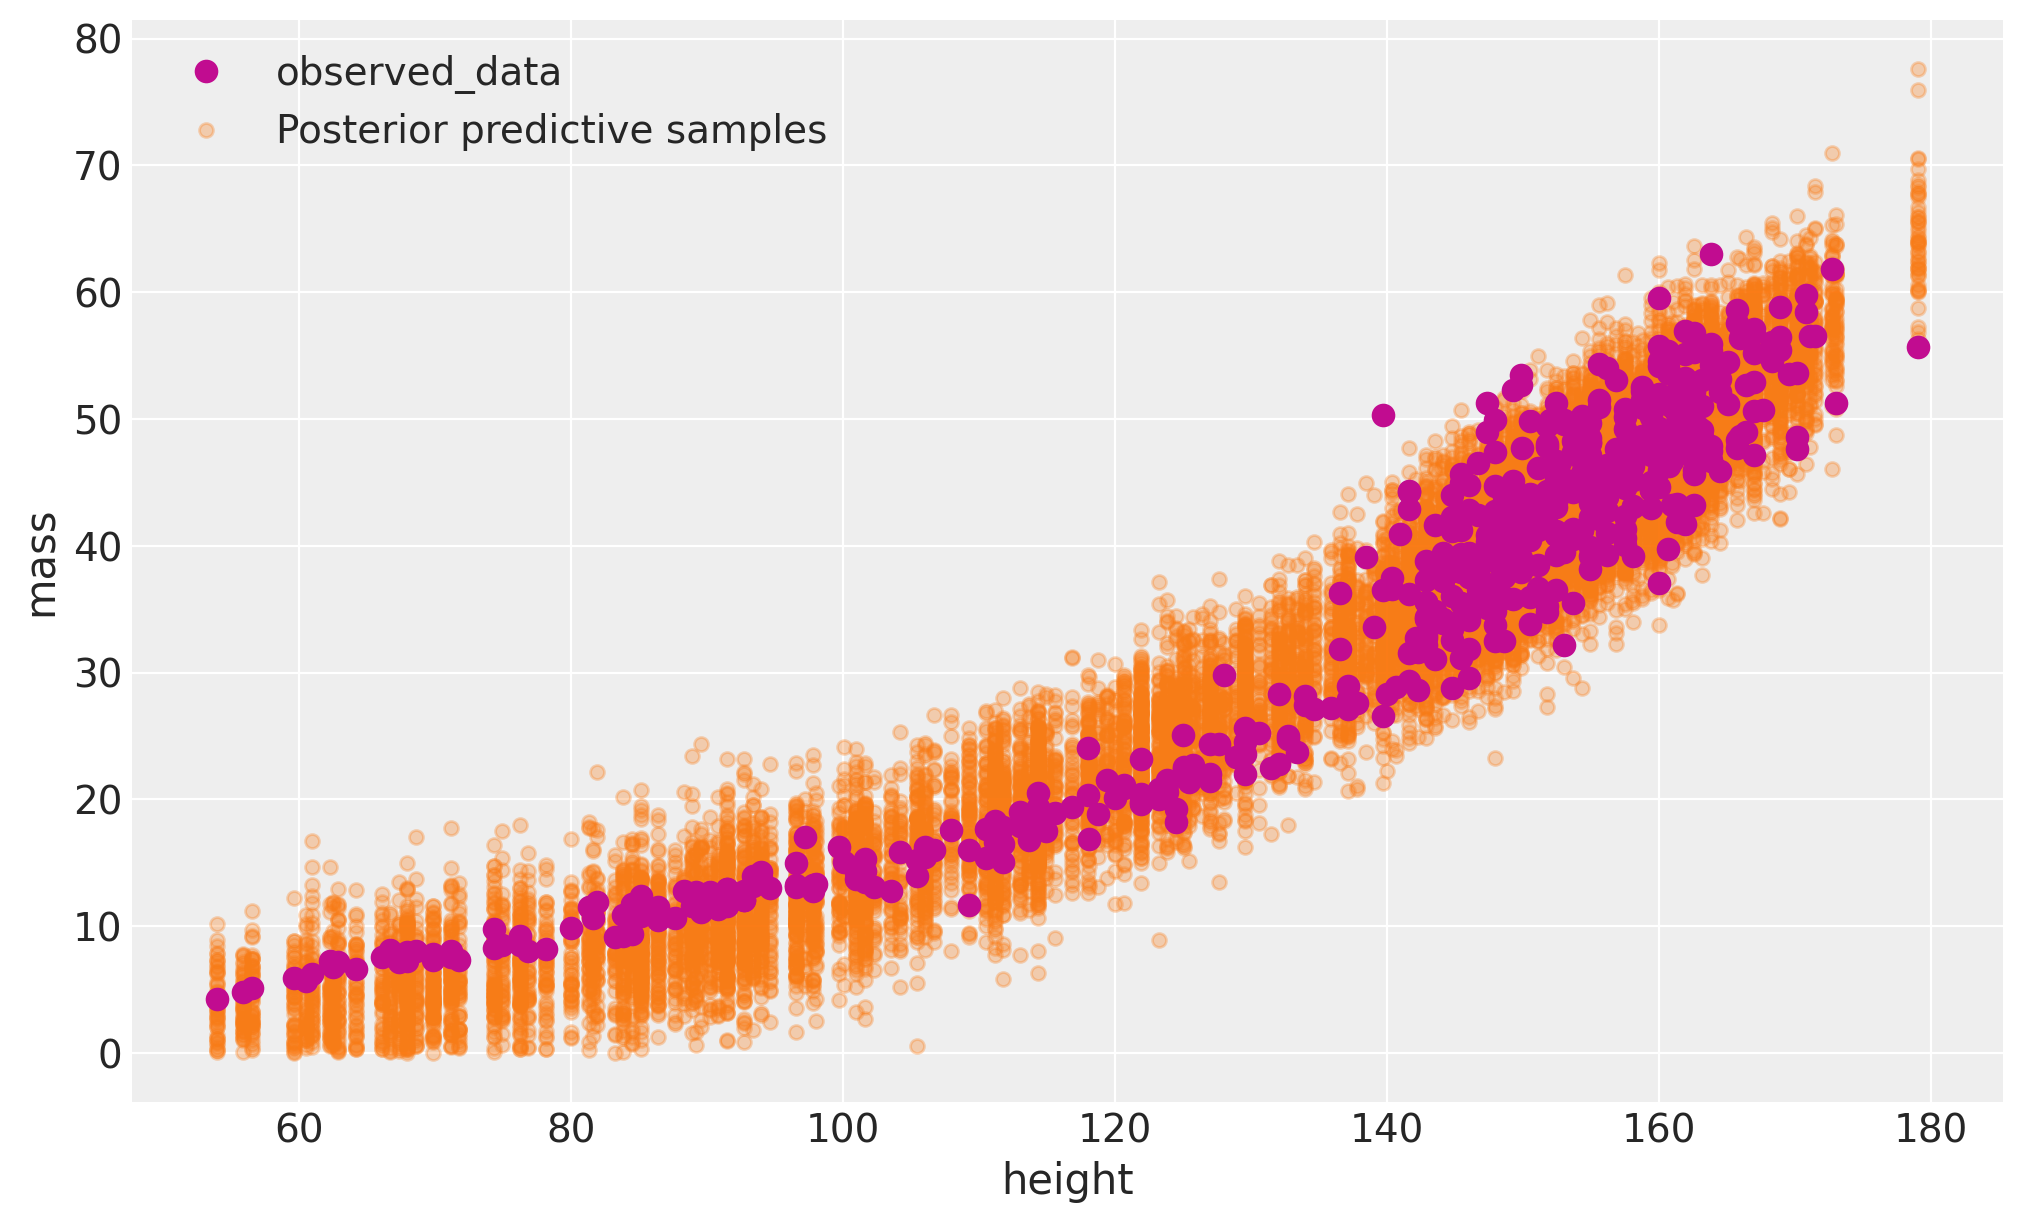

In [195]:
az.plot_lm(idata=idata_height_exp_male, y='mass', x='height')

In [3]:
!quarto render height.ipynb --to html

pandoc 
  to: html
  output-file: height.html
  standalone: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: Analysis of Height
  
Output created: height.html

